C:/Users/20115/Desktop/Covid_Phenomena_Dataset/train\Covid


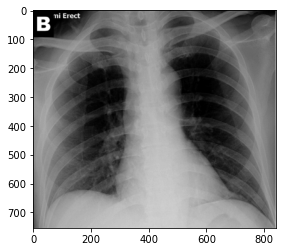

C:/Users/20115/Desktop/Covid_Phenomina_Dataset_train/train\Covid


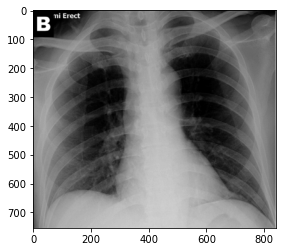

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tqdm import tqdm
import itertools
from tensorflow.keras.models import load_model
import random
from tensorflow.keras.preprocessing import image
from matplotlib import interactive
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
import matplotlib.image as mpimg

DATADIR = "C:/Users/20115/Desktop/Covid_Phenomena_Dataset/train"
DATADIR2 = "C:/Users/20115/Desktop/Covid_Phenomina_Dataset_train/train"
validation="C:/Users/20115/Desktop/Covid_Phenomena_Dataset/validation"
CATEGORIES = ["Covid","Normal","Phenomena"]

for cat in CATEGORIES:
    path = os.path.join(DATADIR,cat)
    print(path)
    for img in os.listdir(path):
        img_array= cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array ,cmap="gray")
        plt.show()
        break
    break
for cat2 in CATEGORIES:
    path = os.path.join(DATADIR2,cat)
    print(path)
    for img2 in os.listdir(path):
        img_array= cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array ,cmap="gray")
        plt.show()
        break
    break

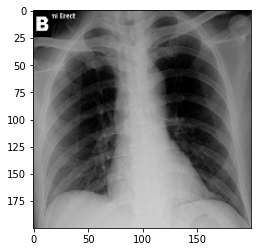

In [3]:
IMG_SIZE = 200

new_array = cv2.resize(img_array ,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array ,cmap="gray")

In [4]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 251/251 [00:06<00:00, 41.77it/s]

753


In [5]:
training_data2 = []

def create_training_data2():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR2,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data2.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data2()

print(len(training_data2))

100%|██████████| 318/318 [00:04<00:00, 64.88it/s]

954


In [8]:
validation_data = []

def create_validation_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(validation,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                validation_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_validation_data()

print(len(validation_data))

100%|██████████| 67/67 [00:02<00:00, 32.82it/s]

201


In [9]:

random.shuffle(training_data)
random.shuffle(training_data2)
random.shuffle(validation_data)

In [10]:
X_train = []
y_train= []

for features,label in training_data:
    X_train.append(features)
    y_train.append(label)



X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train=np.array(y_train)
print(y_train)

[2 0 2 0 1 2 0 2 1 0 1 1 0 1 2 1 0 1 1 2 1 1 0 2 2 0 1 1 0 0 0 2 0 0 1 1 0
 1 2 1 0 0 1 2 0 1 0 1 1 2 2 2 0 0 1 0 2 2 1 2 1 2 2 2 1 0 2 0 1 2 1 1 1 0
 2 0 1 2 1 0 2 2 2 1 0 0 0 0 0 0 2 1 2 0 0 1 2 0 0 1 1 0 1 0 2 0 0 1 0 1 0
 2 2 0 2 2 1 1 1 1 0 1 2 2 0 1 1 1 1 0 0 2 1 2 1 2 2 2 2 0 0 2 0 2 1 2 0 0
 2 2 1 0 1 0 0 2 1 1 1 2 2 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 1 2 1 1 2 2 2 1 1
 1 0 0 2 2 1 1 2 0 0 0 2 1 1 0 2 1 1 0 0 1 1 1 0 0 1 0 0 2 0 2 0 0 2 1 1 2
 0 0 0 1 2 0 2 2 2 0 2 0 2 1 1 0 2 1 2 0 1 2 1 1 1 2 1 0 0 1 1 0 1 0 2 0 1
 1 0 1 0 2 2 1 0 0 2 1 0 0 1 1 0 2 1 2 1 1 0 2 2 2 0 2 1 2 2 1 2 0 1 1 2 2
 1 2 0 0 2 2 1 0 1 2 2 1 0 2 2 0 0 2 0 1 0 0 0 2 0 1 1 0 1 0 2 2 2 0 2 1 0
 0 0 0 2 0 0 2 0 1 1 2 1 0 1 2 2 0 1 0 2 1 2 0 1 1 1 0 1 0 1 2 2 0 0 2 0 1
 0 0 2 2 0 2 2 2 2 0 2 2 1 0 0 0 0 2 2 2 0 2 2 2 2 2 1 1 2 2 1 0 1 2 1 2 0
 1 1 0 2 0 2 2 2 0 1 2 1 1 1 2 1 0 0 2 0 1 2 1 2 2 1 2 0 0 0 0 0 2 1 2 0 0
 2 2 1 2 1 1 0 1 1 2 0 1 2 1 1 2 1 1 0 1 1 0 1 2 1 2 0 2 2 1 1 1 2 0 0 2 2
 0 1 1 0 2 1 1 0 0 1 1 2 

In [11]:
X_train2 = []
y_train2= []

for features,label in training_data2:
    X_train2.append(features)
    y_train2.append(label)



X_train2 = np.array(X_train2).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train2=np.array(y_train2)
print(y_train2)

[2 0 0 1 0 1 0 2 2 1 2 1 0 1 1 2 1 0 1 1 0 0 0 0 1 1 2 2 1 2 0 2 2 2 0 0 1
 1 1 2 1 0 1 2 0 2 1 2 0 2 0 0 0 2 2 0 0 0 1 1 1 0 2 0 0 0 1 2 0 2 0 0 1 1
 1 0 1 2 0 1 1 1 2 0 1 2 1 0 2 0 0 0 2 0 1 1 1 0 2 0 2 0 0 1 2 2 2 2 0 2 1
 2 2 0 2 2 2 2 0 2 1 1 0 1 2 2 2 2 1 0 2 2 0 0 1 0 1 1 0 0 2 1 0 0 0 2 2 1
 0 1 0 2 2 2 2 2 0 2 1 1 0 0 0 0 2 0 2 1 2 0 1 2 1 2 0 0 0 2 0 0 0 2 1 2 2
 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 2 0 2 0 2 2 0 2 1 1 1 2 0 1 2 0 0 1 2 2 1
 1 0 2 0 0 2 2 2 1 2 1 1 1 1 0 1 1 1 1 2 2 2 1 0 1 1 2 1 1 0 0 1 2 2 2 0 0
 0 1 0 2 1 2 0 0 2 1 2 0 1 0 0 0 0 2 1 1 2 0 0 2 1 1 1 2 1 0 1 1 1 1 1 1 2
 1 2 0 0 0 0 0 2 2 1 0 2 2 1 2 1 0 2 0 0 1 1 0 0 1 2 0 0 1 2 1 0 1 2 0 1 0
 0 2 2 1 0 0 1 2 1 0 2 1 1 2 0 2 2 0 0 2 1 1 0 2 0 2 2 1 0 2 0 1 1 1 1 2 2
 1 0 1 1 0 2 2 2 2 1 1 0 1 0 2 2 1 0 1 2 0 2 2 0 0 1 1 2 1 0 0 2 0 2 1 1 0
 0 0 2 2 1 1 1 2 1 2 2 2 2 2 2 2 2 0 2 2 1 2 1 2 1 0 0 2 0 1 0 1 2 1 0 1 1
 0 0 2 2 1 0 2 2 2 2 0 1 2 0 2 0 0 0 0 0 1 1 1 0 1 1 2 0 0 2 2 2 0 1 0 0 2
 1 0 1 2 0 0 2 0 0 0 1 0 

In [12]:
X_val = []
y_val= []

for features,label in validation_data:
    X_val.append(features)
    y_val.append(label)



X_val = np.array(X_val).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val =np.array(y_val)
print(y_val)

[0 1 1 1 2 2 2 0 1 2 1 0 0 2 2 1 0 0 0 1 2 2 1 0 2 2 0 2 2 0 0 0 0 1 1 1 1
 0 1 0 1 1 2 0 1 1 1 0 2 0 1 2 2 0 2 2 2 2 2 1 2 1 2 0 2 0 1 2 1 1 2 2 2 2
 0 1 0 2 1 1 2 1 0 0 1 0 2 2 1 0 2 1 0 0 1 2 1 2 1 2 2 0 2 1 0 1 0 2 0 1 2
 0 0 1 1 2 0 2 0 0 2 2 0 2 1 0 1 2 2 0 2 0 1 1 0 1 0 1 0 1 1 2 1 1 2 1 1 0
 0 0 0 2 0 2 2 0 2 1 0 0 0 2 1 1 1 1 0 0 1 1 2 0 1 1 0 1 2 2 2 2 0 0 1 1 0
 2 2 0 2 0 2 2 1 0 0 1 0 0 2 1 1]


In [13]:
import pickle

pickle_out = open("X1.pickle","wb")
pickle.dump(X_train2, pickle_out)
pickle_out.close()

pickle_out = open("y1.pickle","wb")
pickle.dump(y_train2, pickle_out)
pickle_out.close()



In [14]:
import pickle

pickle_out = open("X2.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("y2.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

In [15]:
import pickle

pickle_out = open("X3.pickle","wb")
pickle.dump(X_val, pickle_out)
pickle_out.close()

pickle_out = open("y3.pickle","wb")
pickle.dump(y_val, pickle_out)
pickle_out.close()

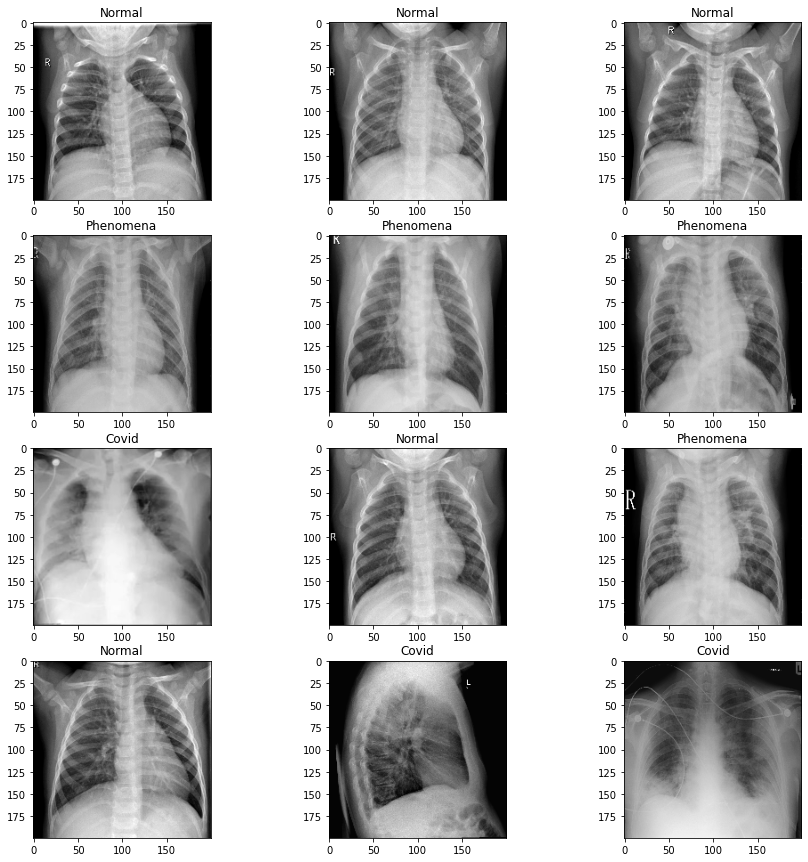

In [16]:
# # Display first 15 images of moles, and how they are classified
w=15
h=15
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 3
X_val=X_val.squeeze()
for i in range(1, columns*rows +1):
    ax = fig.add_subplot(columns, rows, i)
    if y_val[i] == 0:
        ax.title.set_text('Covid')
        plt.imshow(X_val[i], cmap="gray")
    elif y_val[i] == 1 :
        ax.title.set_text('Normal')
        plt.imshow(X_val[i], cmap="gray")
    else :
        ax.title.set_text('Phenomena')
        plt.imshow(X_val[i], cmap="gray")
    
plt.show()

In [19]:
pickle_in = open("X1.pickle","rb")
X = pickle.load(pickle_in)
pickle_in = open("y1.pickle","rb")
y = pickle.load(pickle_in)
from tensorflow.keras.utils import to_categorical
X = X/255.0


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=X.shape[1:]))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(3 , activation='softmax'))

optimizer='Adam'
loss='categorical_crossentropy'
metrics=['accuracy']



model.compile(optimizer, loss=loss, metrics=metrics)


history1=model.fit(
  X,
  to_categorical(y),
  epochs=25,
  validation_split=0.3);


print(model.summary())
model.save('Covid_Phenomena_1.model')

Train on 667 samples, validate on 287 samples
Epoch 1/25
667/667 [==============================] - 130s 195ms/sample - loss: 1.1010 - accuracy: 0.3193 - val_loss: 1.0995 - val_accuracy: 0.3310
Epoch 2/25
667/667 [==============================] - 134s 201ms/sample - loss: 1.1006 - accuracy: 0.2909 - val_loss: 1.0987 - val_accuracy: 0.3206
Epoch 3/25
667/667 [==============================] - 139s 208ms/sample - loss: 1.0988 - accuracy: 0.3388 - val_loss: 1.0993 - val_accuracy: 0.3206
Epoch 4/25
667/667 [==============================] - 116s 174ms/sample - loss: 1.0988 - accuracy: 0.3388 - val_loss: 1.0994 - val_accuracy: 0.3206
Epoch 5/25
667/667 [==============================] - 121s 182ms/sample - loss: 1.0990 - accuracy: 0.3118 - val_loss: 1.0991 - val_accuracy: 0.3206
Epoch 6/25
667/667 [==============================] - 118s 177ms/sample - loss: 1.0986 - accuracy: 0.3373 - val_loss: 1.0990 - val_accuracy: 0.3206
Epoch 7/25
667/667 [==============================] - 118s 177ms/s

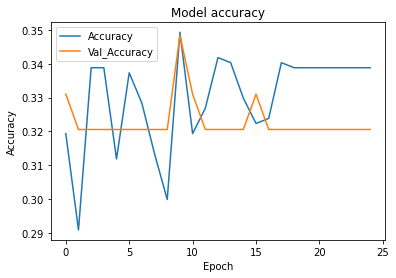

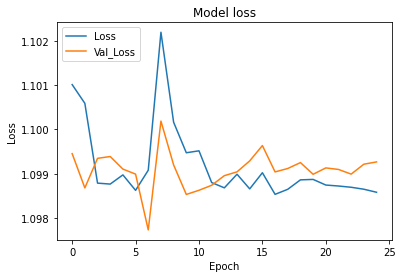

In [21]:

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_Loss'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(np.argmax(classes, axis=1), y_test)

cm_plot_label =['Covid', 'normal',"phenumina"]
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Metrix for X-ray Image')

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

print('Classification Report')
accuracy_score(np.argmax(classes, axis=1), y_test)
print(accuracy_score(np.argmax(classes, axis=1), y_test))
target_names = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())   
report = classification_report(target_names, np.argmax(classes, axis=1), target_names=class_labels)
print(report) 

In [75]:

pickle_in = open("X2.pickle","rb")
X = pickle.load(pickle_in)
pickle_in = open("y2.pickle","rb")
y = pickle.load(pickle_in)
from tensorflow.keras.utils import to_categorical
X = X/255.0
pickle_in = open("X3.pickle","rb")
X_validation = pickle.load(pickle_in)
pickle_in = open("y3.pickle","rb")
y_validation = pickle.load(pickle_in)
from tensorflow.keras.utils import to_categorical
X = X/255.0
X_validation=X_validation/255.0
y_validation=to_categorical(y_validation)



model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=X.shape[1:]))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu', input_dim=8))
model.add(Dense(3 , activation='softmax'))

optimizer='Adam'
loss='categorical_crossentropy'
metrics=['accuracy']



model.compile(optimizer, loss=loss, metrics=metrics)


history2=model.fit(
  X,
  to_categorical(y),
  epochs=20,
  validation_data=(X_validation,y_validation));


print(model.summary())
model.save('Covid_Phenomena_2.model')

Train on 753 samples, validate on 201 samples
Epoch 1/20
753/753 [==============================] - 133s 177ms/sample - loss: 1.1016 - accuracy: 0.3373 - val_loss: 1.0985 - val_accuracy: 0.3333
Epoch 2/20
753/753 [==============================] - 149s 198ms/sample - loss: 1.0987 - accuracy: 0.3068 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 3/20
704/753 [===========================>..] - ETA: 8s - loss: 1.0987 - accuracy: 0.3259 

KeyboardInterrupt: 

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_Loss'], loc='upper left')
plt.show()

In [12]:

img_width, img_height = 150, 150

train_data_dir = "C:/Users/20115/Desktop/Covid_Phenomena_Dataset/train"
validation_data_dir = "C:/Users/20115/Desktop/Covid_Phenomena_Dataset/validation"
nb_train_samples = 753
nb_validation_samples = 201
epochs = 15
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3 , activation='softmax'))


loss='categorical_crossentropy'



model.compile(loss=loss,
              optimizer='rmsprop',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=16,class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(150, 150),
    batch_size=16,class_mode='categorical')

history3 = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('first_try.h5')



print(model.summary())
model.save('Covid_Phenomena_3.model')

Found 753 images belonging to 3 classes.
Found 201 images belonging to 3 classes.
Epoch 1/15
47/47 [==============================] - 20s 429ms/step - loss: 1.0063 - accuracy: 0.4830 - val_loss: 0.6631 - val_accuracy: 0.6719
Epoch 2/15
47/47 [==============================] - 20s 428ms/step - loss: 0.7605 - accuracy: 0.7056 - val_loss: 0.4513 - val_accuracy: 0.8802
Epoch 3/15
47/47 [==============================] - 20s 424ms/step - loss: 0.6018 - accuracy: 0.7843 - val_loss: 0.5144 - val_accuracy: 0.7604
Epoch 4/15
47/47 [==============================] - 20s 423ms/step - loss: 0.4694 - accuracy: 0.8345 - val_loss: 0.2427 - val_accuracy: 0.8854
Epoch 5/15
47/47 [==============================] - 19s 408ms/step - loss: 0.4215 - accuracy: 0.8412 - val_loss: 0.1806 - val_accuracy: 0.9167
Epoch 6/15
47/47 [==============================] - 19s 399ms/step - loss: 0.3674 - accuracy: 0.8548 - val_loss: 0.1124 - val_accuracy: 0.9531
Epoch 7/15
47/47 [==============================] - 19s 414m

In [20]:

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='upper left')
plt.show()

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_Loss'], loc='upper left')
plt.show()

NameError: name 'history3' is not defined

In [32]:

img_width, img_height = 150, 150

train_data_dir = "C:/Users/20115/Desktop/Covid_Phenomena_Dataset/train"
validation_data_dir = "C:/Users/20115/Desktop/Covid_Phenomena_Dataset/validation"
nb_train_samples = 753
nb_validation_samples = 201
epochs = 20
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3 , activation='softmax'))


loss='categorical_crossentropy'



model.compile(loss=loss,
              optimizer='rmsprop',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=16,class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(150, 150),
    batch_size=16,class_mode='categorical')

history2 = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('sec.h5')



print(model.summary())
model.save('Covid_Phenomena_4.model')

Found 753 images belonging to 3 classes.
Found 201 images belonging to 3 classes.
Epoch 1/20
47/47 [==============================] - 23s 486ms/step - loss: 1.0089 - accuracy: 0.4885 - val_loss: 0.5812 - val_accuracy: 0.7604
Epoch 2/20
47/47 [==============================] - 23s 498ms/step - loss: 0.7693 - accuracy: 0.7042 - val_loss: 0.3701 - val_accuracy: 0.8177
Epoch 3/20
47/47 [==============================] - 24s 508ms/step - loss: 0.6032 - accuracy: 0.7612 - val_loss: 0.2834 - val_accuracy: 0.8906
Epoch 4/20
47/47 [==============================] - 25s 525ms/step - loss: 0.4918 - accuracy: 0.8128 - val_loss: 0.3144 - val_accuracy: 0.8802
Epoch 5/20
47/47 [==============================] - 25s 528ms/step - loss: 0.5070 - accuracy: 0.8195 - val_loss: 0.2646 - val_accuracy: 0.9062
Epoch 6/20
47/47 [==============================] - 24s 503ms/step - loss: 0.4522 - accuracy: 0.8391 - val_loss: 0.2097 - val_accuracy: 0.9271
Epoch 7/20
47/47 [==============================] - 23s 500m

In [ ]:

plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='upper left')
plt.show()

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_Loss'], loc='upper left')
plt.show()

In [27]:
test_steps_per_epoch = np.math.ceil(validation_generator.samples / validation_generator.batch_size)

predictions = model.predict_generator(validation_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

[[9.9991262e-01 1.5735976e-06 8.5881446e-05]]
Covid


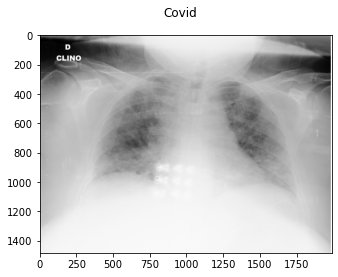

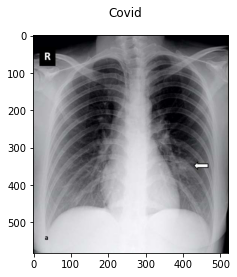

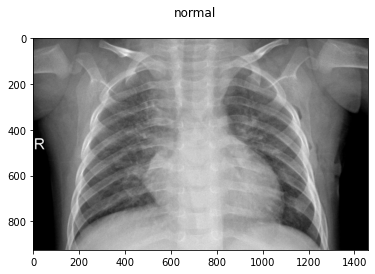

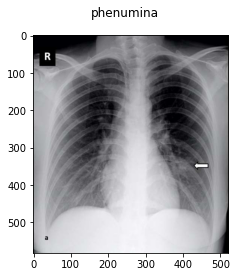

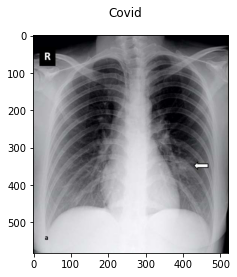

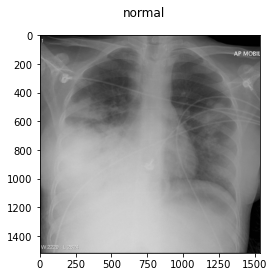

In [149]:

CATEGORIES = ["Covid", "Normal","Phenomena"]


def prepare(filepath):
    IMG_SIZE = 200  # 50 in txt-based
    img_array = cv2.imread(filepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(1, IMG_SIZE, IMG_SIZE, 3)/255.0


model = tf.keras.models.load_model("choosen2.model")

prediction1 = model.predict([prepare('C:/Users/20115/h1.jpeg')])
prediction2 = model.predict([prepare('C:/Users/20115/xray.png')])
prediction3 = model.predict([prepare('C:/Users/20115/norm.jpeg')])
prediction4 = model.predict([prepare('C:/Users/20115/person16_bacteria_54.jpeg')])
prediction5 = model.predict([prepare('C:/Users/20115/sick1.png')])
prediction6 = model.predict([prepare('C:/Users/20115/normal1.jpeg')])

test1 =CATEGORIES[int(prediction1[0][0])]
test2 =CATEGORIES[int(prediction2[0][0])]
test3 =CATEGORIES[int(prediction3[0][0])]
test4 =CATEGORIES[int(prediction4[0][0])]
test5 =CATEGORIES[int(prediction5[0][0])]
test6 =CATEGORIES[int(prediction6[0][0])]
print(prediction1)
pred_name1 = CATEGORIES[np.argmax(prediction1)]
pred_name2 = CATEGORIES[np.argmax(prediction2)]
pred_name3 = CATEGORIES[np.argmax(prediction3)]
pred_name4 = CATEGORIES[np.argmax(prediction4)]
pred_name5 = CATEGORIES[np.argmax(prediction5)]
pred_name6 = CATEGORIES[np.argmax(prediction6)]
print(pred_name1)
fig, ax = plt.subplots()
fig.suptitle(pred_name1, fontsize=12)
np_img = mpimg.imread('C:/Users/20115/h1.jpeg')
plt.imshow(np_img ,cmap='gray')

fig, ax = plt.subplots()
fig.suptitle(pred_name2, fontsize=12)
np_img = mpimg.imread('C:/Users/20115/xray.png')
plt.imshow(np_img,cmap='gray')

fig, ax = plt.subplots()
fig.suptitle(pred_name3, fontsize=12)
np_img = mpimg.imread('person16_bacteria_54.jpeg')
plt.imshow(np_img,cmap='gray')

fig, ax = plt.subplots()
fig.suptitle(pred_name4, fontsize=12)
np_img = mpimg.imread('C:/Users/20115/hamada.png')
plt.imshow(np_img,cmap='gray')

fig, ax = plt.subplots()
fig.suptitle(pred_name5, fontsize=12)
np_img = mpimg.imread('C:/Users/20115/sick1.png')
plt.imshow(np_img,cmap='gray')

fig, ax = plt.subplots()
fig.suptitle(pred_name6, fontsize=12)
np_img = mpimg.imread('C:/Users/20115/sick2.jpg')
plt.imshow(np_img)

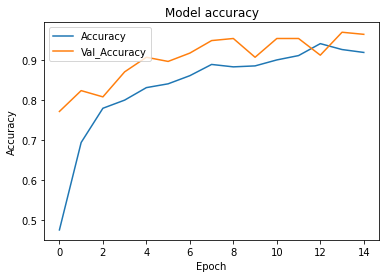

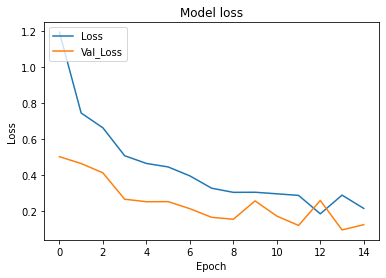

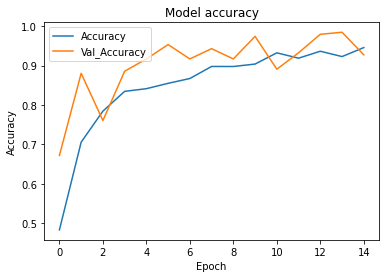

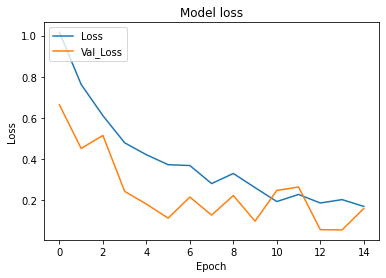

In [18]:
TEST_DIR ="C:/Users/20115/Desktop/Covid_Phenomena_Dataset/test/"
test_data = []
CATEGORIES = ["Covid", "Normal","Phenomena"]
def create_test_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(TEST_DIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                new_arr1=new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
                test_data.append([new_arr1, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_test_data()

print(len(test_data))


100%|██████████| 4/4 [00:00<00:00, 95.24it/s]

14


In [19]:
X_test = []
y_test = []

for f,l in test_data:
    X_test.append(f)
    y_test.append(l)



X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test =np.array(y_test)
print(y_test)

[0 0 0 0 1 1 1 1 1 1 2 2 2 2]


In [20]:

images = []
actual=[]
CATEGORIES = ["Covid", "Normal","Phenomena"]
model = tf.keras.models.load_model("CNN_Covid_Phenomena_Secound_2.model")
TEST_DIR ="C:/Users/20115/Desktop/Covid_Phenomena_Dataset/validation/"
for category in CATEGORIES:  # do dogs and cats
     path = os.path.join(TEST_DIR,category)
     class_num = CATEGORIES.index(category) 
     for img in os.listdir(path):
         # create path to dogs and cats
        IMG_SIZE = 150  # 50 in txt-based
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        new_array=new_array.reshape(1, IMG_SIZE, IMG_SIZE, 3)
        actual.append([new_array, class_num])
        images.append(new_array/255.)
        
        # stack up images list to pass for prediction
images = np.vstack(images)

X_train=[]
y_train=[]

X_test = []
y_test = []

for f,l in actual:
    X_test.append(f)
    y_test.append(l)
for f,l in actual:
    X_train.append(f)
    y_train.append(l)

X_test = np.array(X_test).reshape(-3, IMG_SIZE, IMG_SIZE, 3)
y_test =np.array(y_test)


X_test=X_test/255.0

X_train = np.array(X_train).reshape(-3, IMG_SIZE, IMG_SIZE, 3)
y_train =np.array(y_train)


X_train=X_train/255.0
X_Test2=X_test.squeeze()





In [21]:
import random

random.shuffle(test_data)

201
7


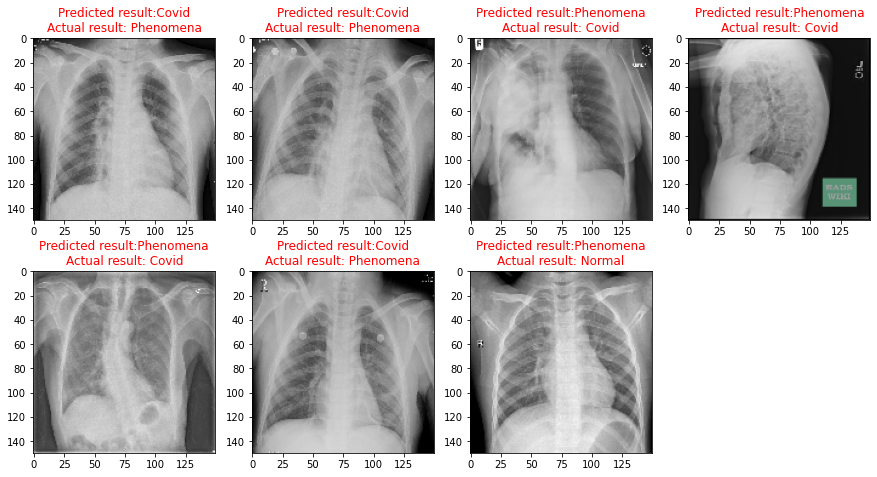

In [22]:
i=0
prop_class=[]
mis_class=[]
classes = model.predict(images)

print(len(y_test))
for i in range(len(y_test)):
    if(np.argmax(classes[i]))==y_test[i]:
        prop_class.append(i)

i=0
for i in range(len(y_test)):
    if([np.argmax(classes[i])])!=y_test[i]:
        mis_class.append(i)
print(len(mis_class))
random.shuffle(prop_class)
random.shuffle(mis_class)
# # Display first 8 images of benign
w=60
h=40
fig=plt.figure(figsize=(15,25))
columns = 4
rows = 6

    
for i in range(len(mis_class)):
    ax = fig.add_subplot(rows, columns, i+1)
    ax.set_title("Predicted result:"+ CATEGORIES[np.argmax(classes[mis_class[i]])]
                       +"\n"+"Actual result: "+ CATEGORIES[y_test[mis_class[i]]] , fontdict={'color': 'red', 'fontweight': 'medium'})
    ax.Color = 'red';
    ax.imshow(X_Test2[mis_class[i]], cmap="gray")
    

C:\Users\20115\Anaconda3\envs\Covidgp\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


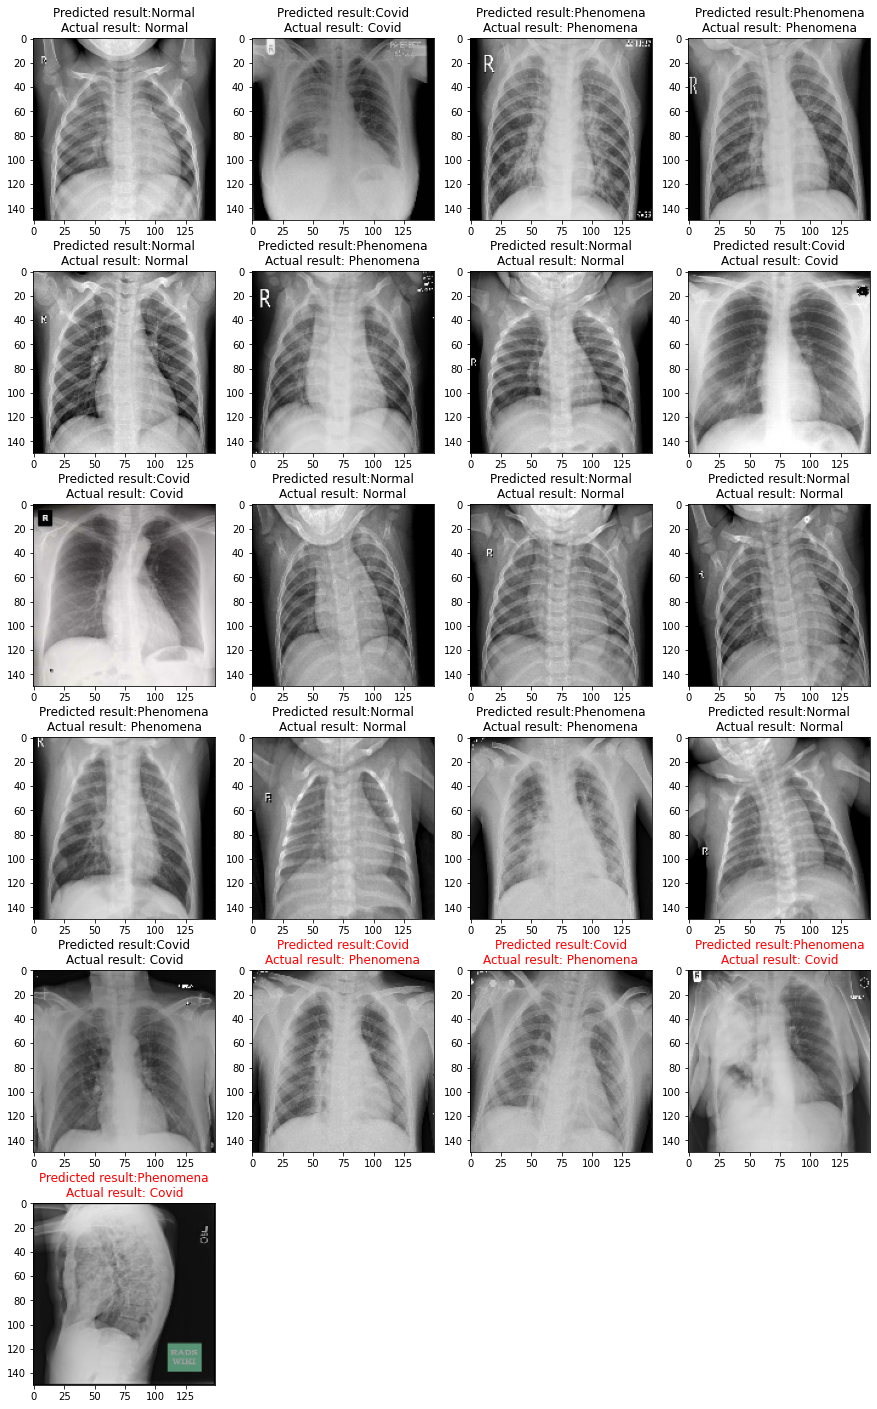

In [23]:
w=60
h=40
fig=plt.figure(figsize=(15,25))
columns = 4
rows = 6 
for i in range(0,19):
    ax = fig.add_subplot(rows, columns, i+1)
    ax.set_title("Predicted result:"+ CATEGORIES[np.argmax(classes[prop_class[i]])]
                       +"\n"+"Actual result: "+ CATEGORIES[y_test[prop_class[i]]] )
    ax.Color = 'red';
    ax.imshow(X_Test2[prop_class[i]], cmap="gray")
    
for y in range(4):
    ax1 = fig.add_subplot(rows, columns, y+i)
    ax1.set_title("Predicted result:"+ CATEGORIES[np.argmax(classes[mis_class[y]])]
                       +"\n"+"Actual result: "+ CATEGORIES[y_test[mis_class[y]]] , fontdict={'color': 'red', 'fontweight': 'medium'})
    ax1.Color = 'red';
    ax1.imshow(X_Test2[mis_class[y]], cmap="gray")
plt.show()


In [1]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(np.argmax(classes, axis=1), y_test)

cm_plot_label =['Covid', 'normal',"phenumina"]
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Metrix for X-ray Image')

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

print('Classification Report')
accuracy_score(np.argmax(classes, axis=1), y_test)
print(accuracy_score(np.argmax(classes, axis=1), y_test))
target_names = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())   
report = classification_report(target_names, np.argmax(classes, axis=1), target_names=class_labels)
print(report) 

NameError: name 'plt' is not defined

In [25]:

from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
CATEGORIES = ["Covid", "Normal","Phenomina"]
y_prob = model.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))




One-vs-One ROC AUC scores:
0.994097 (macro),
0.994097 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.994097 (macro),
0.994097 (weighted by prevalence)


In [26]:
model.fit(X_train, to_categorical(y_train), epochs=5, batch_size=100, verbose=1)


Train on 201 samples
Epoch 1/5
201/201 [==============================] - 2s 12ms/sample - loss: 0.3971 - accuracy: 0.8756
Epoch 2/5
201/201 [==============================] - 1s 7ms/sample - loss: 1.2506 - accuracy: 0.7612
Epoch 3/5
201/201 [==============================] - 2s 7ms/sample - loss: 0.2275 - accuracy: 0.9303
Epoch 4/5
201/201 [==============================] - 1s 7ms/sample - loss: 0.0895 - accuracy: 0.9652
Epoch 5/5
201/201 [==============================] - 2s 8ms/sample - loss: 0.0927 - accuracy: 0.9552


C:\Users\20115\Anaconda3\envs\Covidgp\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


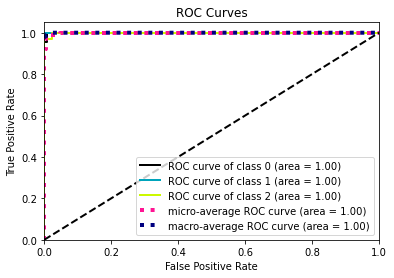

In [28]:
import scikitplot as skplt

y_prob = model.predict_proba(X_test)
y_true = y_test

skplt.metrics.plot_roc_curve(y_test, y_prob)
plt.show()

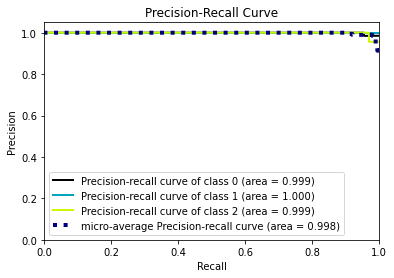

In [29]:
skplt.metrics.plot_precision_recall(y_test, y_prob)

plt.show()